# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mp

def check_point_position(x1, y1, x2, y2, x, y):
    prod = (x2 - x1) * (y - y1) - (y2 - y1) * (x - x1)
    if prod > 0:
        return 'red'
    elif prod < 0:
        return 'blue'

def dist(x1, y1, x2, y2):
  return mp.sqrt((x1 - x2) * (x1 - x2) + (y1 - y2) * (y1 - y2))

def dist_man(x1, y1, x2, y2):
  return abs(x1 - x2) + abs(y1 - y2)

def find(cl):
  point = (0, 0)
  mn = -1
  for i in range(len(cl)):
    sm = 0
    for j in range(len(cl)):
      sm += dist(cl[i][0], cl[i][1], cl[j][0], cl[j][1])
    if (sm < mn or mn == -1):
      mn = sm
      point = (cl[i][0], cl[i][1])
  return point

def find_man(cl):
  point = (0, 0)
  mn = -1
  for i in range(len(cl)):
    sm = 0
    for j in range(len(cl)):
      sm += dist_man(cl[i][0], cl[i][1], cl[j][0], cl[j][1])
    if (sm < mn or mn == -1):
      mn = sm
      point = (cl[i][0], cl[i][1])
  return point

def get_ans(points):
  ln = len(points)
  sm_x = 0
  sm_y = 0
  for i in range(ln):
    sm_x += points[i][0]
    sm_y += points[i][1]
  return int(sm_x / ln * 1000), int(sm_y / ln * 1000)


(1041, 6671)


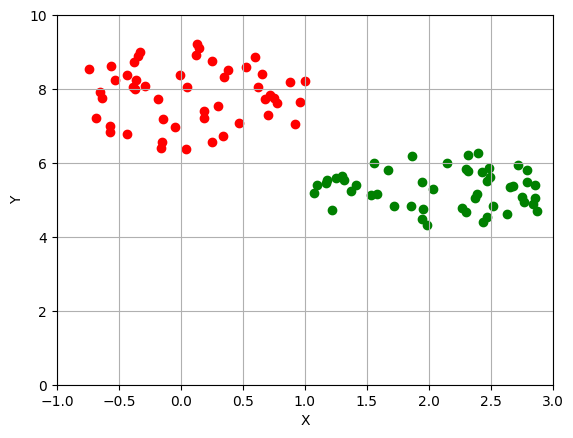

In [58]:
dt = pd.read_excel('0.xls', skiprows=1, header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()

x1, y1 = 0, 4
x2, y2 = 2, 8

colors = []
cl1 = []
cl2 = []
for i in range(len(x)):
  if check_point_position(x1, y1, x2, y2, x[i], y[i]) == 'red':
    cl1.append((x[i], y[i]))
  else:
    cl2.append((x[i], y[i]))

point_1 = find(cl1)
point_2 = find(cl2)
points = []
points.append(point_1)
points.append(point_2)
print(get_ans(points))


X = []
Y = []
for i in range(len(cl1)):
  X.append(cl1[i][0])
  Y.append(cl1[i][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(cl2[i][0])
  Y.append(cl2[i][1])

plt.scatter(X, Y, color='green')
plt.xlim(-1, 3)
plt.ylim(0, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(8177, 738)


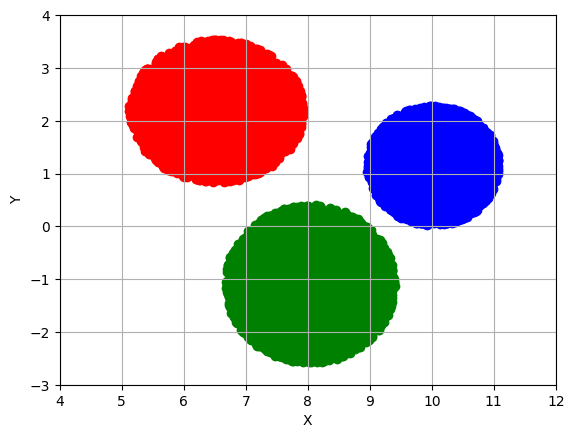

In [47]:

dt = pd.read_excel('1.xls', skiprows=1, header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()

x1_1, y1_1 = 10, -2
x2_1, y2_1 = 8, 3
x1_2, y1_2 = 4, -2
x2_2, y2_2 = 10, 3

colors = []
cl1 = []
cl2 = []
cl3 = []

for i in range(len(x)):
  color_1 = check_point_position(x1_1, y1_1, x2_1, y2_1, x[i], y[i])
  color_2 = check_point_position(x1_2, y1_2, x2_2, y2_2, x[i], y[i])
  if color_1 == 'red' and color_2 == 'red':
    cl1.append((x[i], y[i]))
  elif color_1 == 'red' and color_2 == 'blue':
    cl2.append((x[i], y[i]))
  else:
    cl3.append((x[i], y[i]))

points = []
points.append(find(cl1))
points.append(find(cl2))
points.append(find(cl3))
print(get_ans(points))

X = []
Y = []
for i in range(len(cl1)):
  X.append(cl1[i][0])
  Y.append(cl1[i][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(cl2[i][0])
  Y.append(cl2[i][1])
plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(cl3)):
  X.append(cl3[i][0])
  Y.append(cl3[i][1])
plt.scatter(X, Y, color='blue')
plt.xlim(4, 12)
plt.ylim(-3, 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(23130, 635)


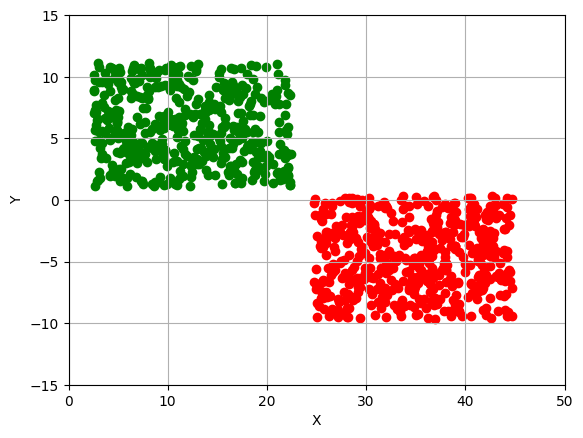

In [48]:

dt = pd.read_excel('2.xlsx', skiprows=1, header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()

x1, y1 = 30, 5
x2, y2 = 10, -10

colors = []
cl1 = []
cl2 = []

for i in range(len(x)):
  color_1 = check_point_position(x1, y1, x2, y2, x[i], y[i])
  if color_1 == 'red':
    cl1.append((x[i], y[i]))
  else:
    cl2.append((x[i], y[i]))

points = []
points.append(find(cl1))
points.append(find(cl2))
print(get_ans(points))

X = []
Y = []
for i in range(len(cl1)):
  X.append(cl1[i][0])
  Y.append(cl1[i][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(cl2[i][0])
  Y.append(cl2[i][1])

plt.scatter(X, Y, color='green')
plt.xlim(0, 50)
plt.ylim(-15, 15)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(3078, -4758)


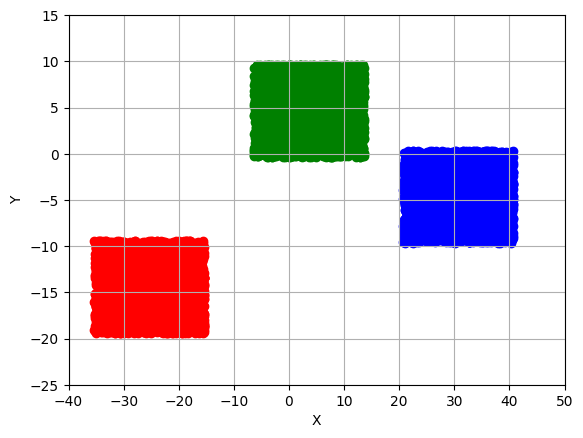

In [52]:

dt = pd.read_excel('3.xlsx', skiprows=1, header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()

x1_1, y1_1 = -10, 0
x2_1, y2_1 = -10, 1
x1_2, y1_2 = 18, 0
x2_2, y2_2 = 18, 1

colors = []
cl1 = []
cl2 = []
cl3 = []

for i in range(len(x)):
  color_1 = check_point_position(x1_1, y1_1, x2_1, y2_1, x[i], y[i])
  color_2 = check_point_position(x1_2, y1_2, x2_2, y2_2, x[i], y[i])
  if color_1 == 'red' and color_2 == 'red':
    cl1.append((x[i], y[i]))
  elif color_1 == 'blue' and color_2 == 'red':
    cl2.append((x[i], y[i]))
  else:
    cl3.append((x[i], y[i]))

points = []
points.append(find_man(cl1))
points.append(find_man(cl2))
points.append(find_man(cl3))
print(get_ans(points))

X = []
Y = []
for i in range(len(cl1)):
  X.append(cl1[i][0])
  Y.append(cl1[i][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(cl2[i][0])
  Y.append(cl2[i][1])
plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(cl3)):
  X.append(cl3[i][0])
  Y.append(cl3[i][1])
plt.scatter(X, Y, color='blue')
plt.xlim(-40, 50)
plt.ylim(-25, 15)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(2588, 4996)


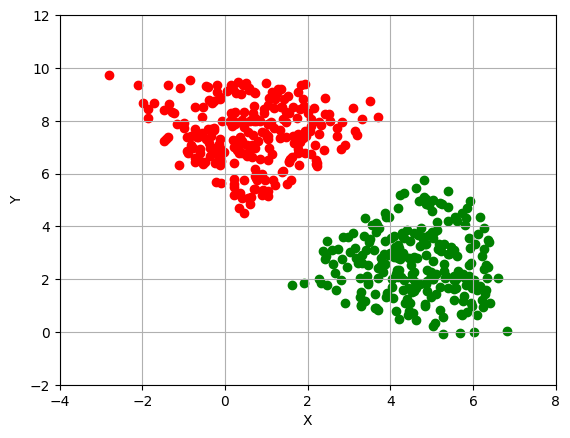

In [54]:

dt = pd.read_excel('4.xlsx', skiprows=1, header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()

x1, y1 = 0, 2
x2, y2 = 4, 6

colors = []
cl1 = []
cl2 = []

for i in range(len(x)):
  color_1 = check_point_position(x1, y1, x2, y2, x[i], y[i])
  if color_1 == 'red':
    cl1.append((x[i], y[i]))
  else:
    cl2.append((x[i], y[i]))

points = []
points.append(find(cl1))
points.append(find(cl2))
print(get_ans(points))

X = []
Y = []
for i in range(len(cl1)):
  X.append(cl1[i][0])
  Y.append(cl1[i][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(cl2[i][0])
  Y.append(cl2[i][1])

plt.scatter(X, Y, color='green')
plt.xlim(-4, 8)
plt.ylim(-2, 12)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(61, 3723)


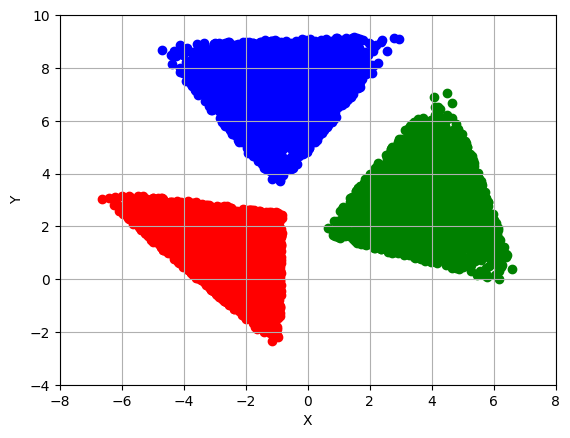

In [57]:

dt = pd.read_excel('5.xlsx', skiprows=1, header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()

x1_1, y1_1 = 4, -2
x2_1, y2_1 = -6, 8
x1_2, y1_2 = 0, 4
x2_2, y2_2 = 4, 8

colors = []
cl1 = []
cl2 = []
cl3 = []

for i in range(len(x)):
  color_1 = check_point_position(x1_1, y1_1, x2_1, y2_1, x[i], y[i])
  color_2 = check_point_position(x1_2, y1_2, x2_2, y2_2, x[i], y[i])
  if color_1 == 'red':
    cl1.append((x[i], y[i]))
  elif color_2 == 'blue':
    cl2.append((x[i], y[i]))
  else:
    cl3.append((x[i], y[i]))

points = []
points.append(find(cl1))
points.append(find(cl2))
points.append(find(cl3))
print(get_ans(points))

X = []
Y = []
for i in range(len(cl1)):
  X.append(cl1[i][0])
  Y.append(cl1[i][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(cl2[i][0])
  Y.append(cl2[i][1])
plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(cl3)):
  X.append(cl3[i][0])
  Y.append(cl3[i][1])
plt.scatter(X, Y, color='blue')
plt.xlim(-8, 8)
plt.ylim(-4, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =
dbscan =

clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("DBSCAN", dbscan),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()